In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

---
#### Bouncing Ball Animation from Leaning Scientific Programming with Python

* Direct link to the [work](https://scipython.com/book2/chapter-7-matplotlib/examples/animating-a-bouncing-ball/)
---

In [2]:
# Acceleration due to gravity, m.s-2.
g = 9.81
# The maximum x-range of ball's trajectory to plot.
XMAX = 5
# The coefficient of restitution for bounces (-v_up/v_down).
cor = 0.65
# The time step for the animation.
dt = 0.005

# Initial position and velocity vectors.
x0, y0 = 0, 4
vx0, vy0 = 1, 0

In [3]:
def get_pos(t=0):
    """A generator yielding the ball's position at time t."""
    x, y, vx, vy = x0, y0, vx0, vy0
    while x < XMAX:
        t += dt
        x += vx0 * dt
        y += vy * dt
        vy -= g * dt
        if y < 0:
            # bounce!
            y = 0
            vy = -vy * cor 
        yield x, y

In [4]:
def init():
    """Initialize the animation figure."""
    ax.set_xlim(0, XMAX)
    ax.set_ylim(0, y0)
    ax.set_xlabel('$x$ /m')
    ax.set_ylabel('$y$ /m')
    line.set_data(xdata, ydata)
    ball.set_center((x0, y0))
    height_text.set_text(f'Height: {y0:.1f} m')
    return line, ball, height_text

In [6]:
def animate(pos):
    """For each frame, advance the animation to the new position, pos."""
    x, y = pos
    xdata.append(x)
    ydata.append(y)
    line.set_data(xdata, ydata)
    ball.set_center((x, y))
    height_text.set_text(f'Height: {y:.1f} m')
    return line, ball, height_text

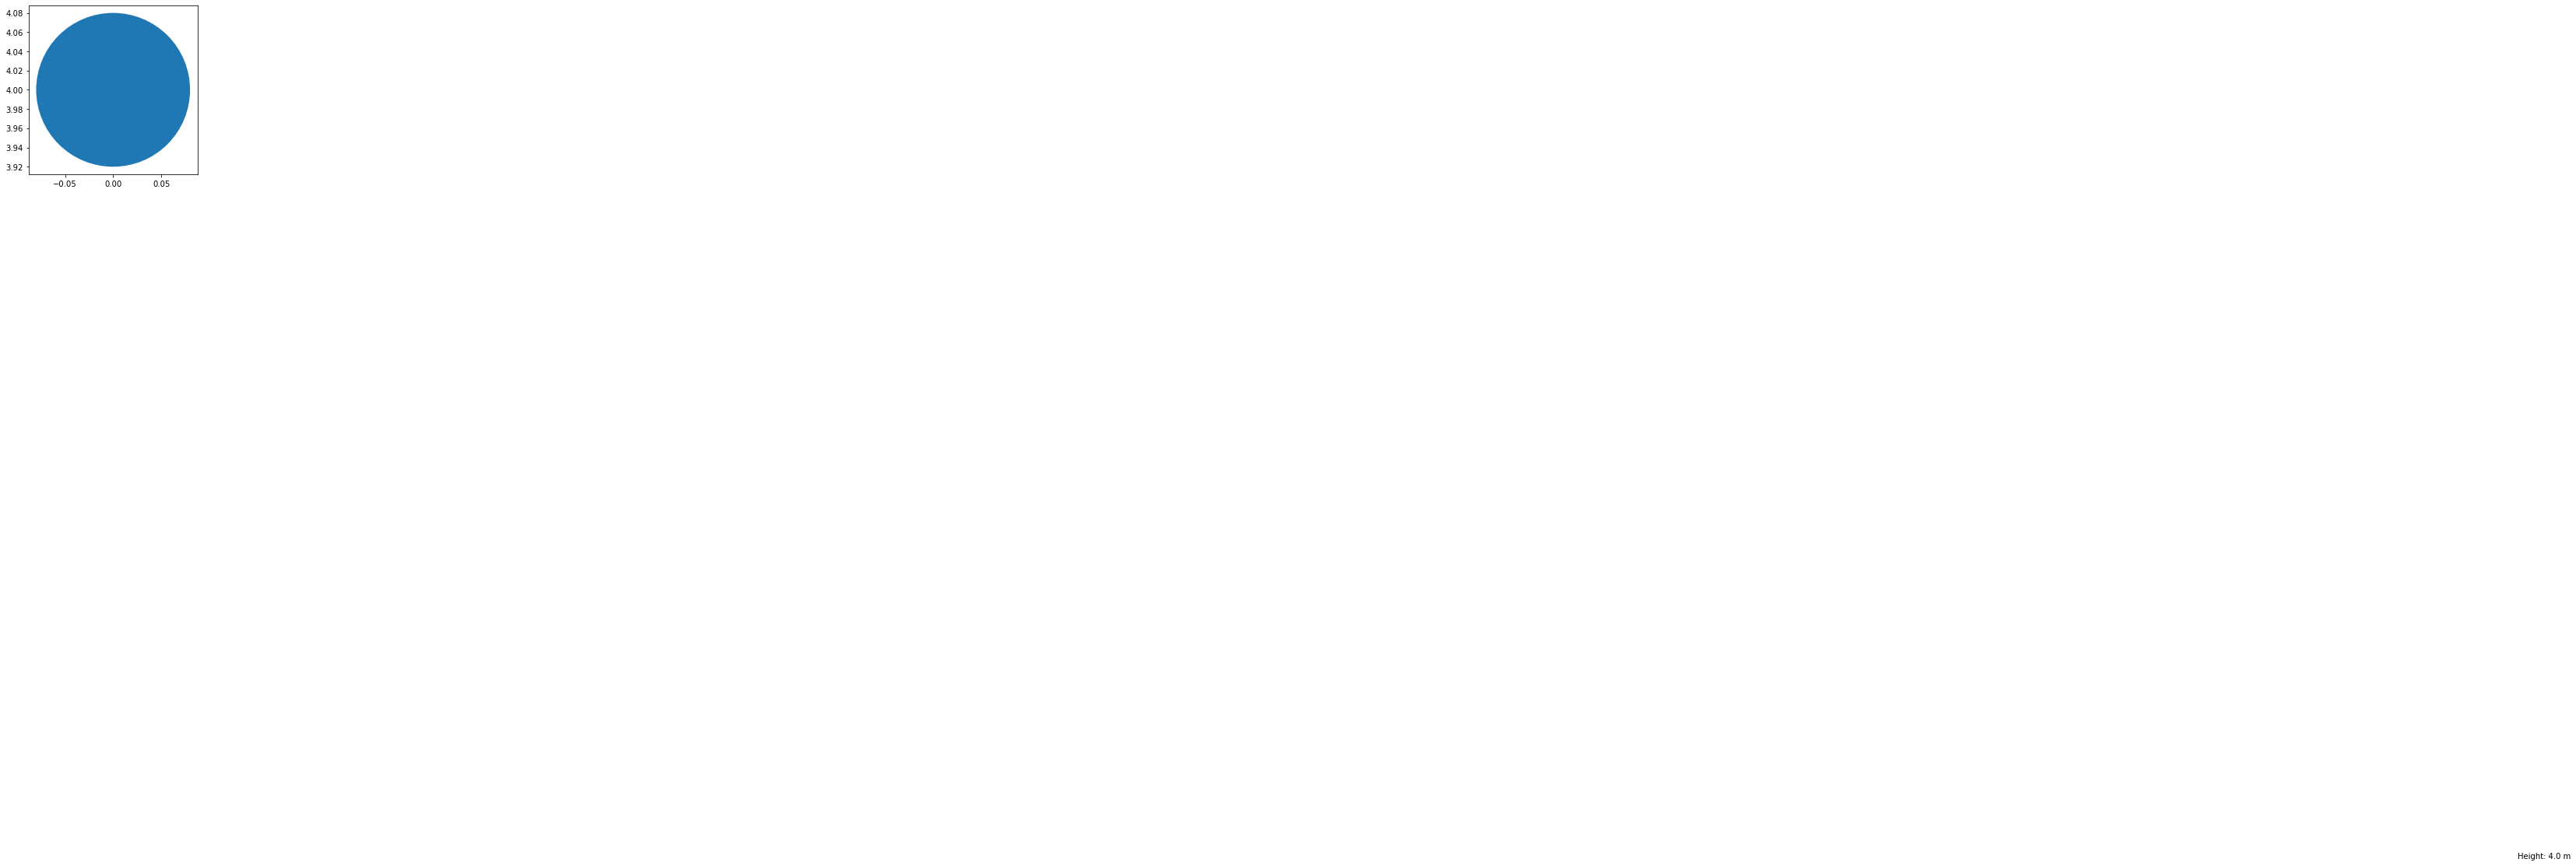

In [7]:
# Set up a new Figure, with equal aspect ratio so the ball appears round.
fig, ax = plt.subplots()
ax.set_aspect('equal')

# These are the objects we need to keep track of.
line, = ax.plot([], [], lw=2)
ball = plt.Circle((x0, y0), 0.08)
height_text = ax.text(XMAX*0.5, y0*0.8, f'Height: {y0:.1f} m')
ax.add_patch(ball)
xdata, ydata = [], []

In [8]:
interval = 1000*dt
ani = animation.FuncAnimation(fig, animate, get_pos, blit=True,
                      interval=interval, repeat=False, init_func=init)

In [9]:
plt.show()